In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cleaned_smartphone_dataset.csv')

In [3]:
df

,brand,model_name,color,price,5G_flag,avg_rating,reviews,battery,processor,RAM,ROM,display_size,display_type
0,MOTOROLA,Moto G05,Green,6999,No,4.2,47939,5100,Unisoc T606,4,64,16.94,HD+ Display
1,POCO,POCO C71,Gold,6999,No,4.1,11677,5200,Unisoc T7250,6,128,17.48,HD+ Display
2,POCO,POCO C71,Blue,6399,No,3.9,25608,5200,Unisoc T7250,4,64,17.48,HD+ Display
3,SAMSUNG,Samsung Galaxy F05,Blue,6499,No,4.2,64333,5000,MediaTek Helio G85,4,64,17.12,HD+ Display
4,MOTOROLA,Motorola Edge 60 Fusion,pantone,22999,Yes,4.5,48575,5500,Qualcomm Snapdragon 7s Gen 2,8,256,16.94,Display
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,SAMSUNG,Samsung Galaxy A36,Black,30999,Yes,4.3,1061,5000,MediaTek Helio G80,8,128,17.02,Full HD+ Display
816,GOOGLE,Google Pixel 9 Pro XL,Other,119999,Yes,4.6,877,5060,Google Tensor G4,16,512,17.27,Display
817,REDMI,Redmi Note 14 Pro+,Purple,26249,Yes,4.2,177,6200,MediaTek Dimensity 9200+,8,128,16.94,Display
818,REALME,Realme P1,Green,13000,Yes,4.4,51664,5000,MediaTek Dimensity 9200+,8,128,16.94,Full HD+ Display


In [4]:
df[['brand','model_name']].drop_duplicates()['brand'].value_counts()

brand
SAMSUNG       45
REALME        30
VIVO          29
MOTOROLA      27
REDMI         18
POCO          16
INFINIX       15
OPPO          12
TECNO         11
APPLE          9
IQOO           9
ITEL           8
ONEPLUS        7
LAVA           7
GOOGLE         7
CMF            2
AI+            2
NOTHING        1
SIAVANTAGE     1
GIONEE         1
XOLO           1
PANASONIC      1
LENOVO         1
LG             1
SNEXIAN        1
HONOR          1
XIAOMI         1
MI             1
MICROMAX       1
Name: count, dtype: int64

## Question 1
write top 10 brand that have maximum no of model

In [5]:
df[['brand','model_name']].drop_duplicates()['brand'].value_counts().head(10)

brand
SAMSUNG     45
REALME      30
VIVO        29
MOTOROLA    27
REDMI       18
POCO        16
INFINIX     15
OPPO        12
TECNO       11
APPLE        9
Name: count, dtype: int64

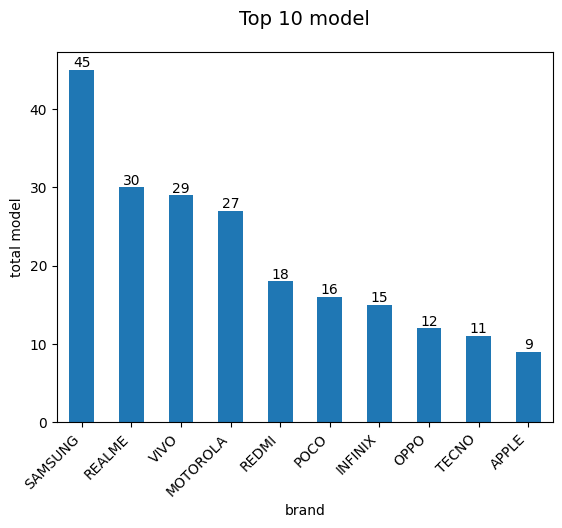

In [6]:
ax=df[['brand','model_name']].drop_duplicates()['brand'].value_counts().head(10).plot(kind='bar',ylabel='total model')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45, ha='right')
ax.set_title("Top 10 model", fontsize=14, pad=20)
plt.show()

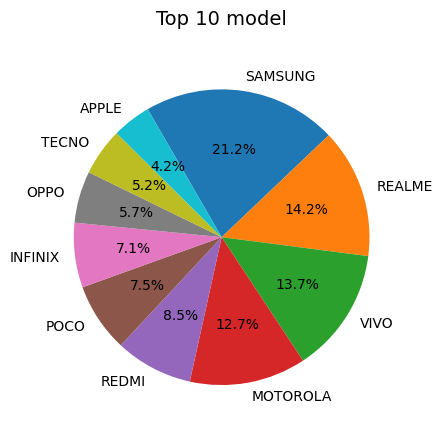

In [7]:
ax=df[['brand','model_name']].drop_duplicates()['brand'].value_counts().head(10).plot(kind='pie',ylabel='',autopct='%0.1f%%', counterclock=False,startangle=120)
ax.set_title("Top 10 model", fontsize=14, pad=20)
plt.show()

## Question 2 
What are the top 10 most common phone colors (excluding 'Other') in the dataset,
and what percentage of phones does each color represent? Highlight the most popular color in the visualization.

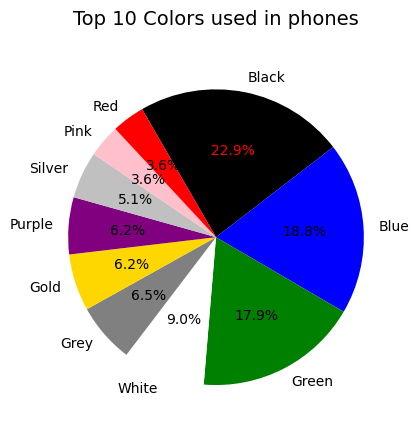

In [8]:
colors=list(df[df['color']!='Other']['color'].value_counts().head(10).index)
ax=df[df['color']!='Other']['color'].value_counts().head(10).plot(kind='pie',ylabel='',autopct='%0.1f%%', counterclock=False,startangle=120,colors=colors)
for text in ax.texts:
    if "22.9%" in text.get_text():  # detect % labels
        text.set_color("red")   # change percent text color
ax.set_title("Top 10 Colors used in phones", fontsize=14, pad=20)
plt.show()

In [9]:
colors=list(df[df['color']!='Other']['color'].value_counts().index)
colors

['Black',
 'Blue',
 'Green',
 'White',
 'Grey',
 'Gold',
 'Purple',
 'Silver',
 'Pink',
 'Red',
 'titanium',
 'gray',
 'pantone',
 'Orange',
 'violet',
 'Yellow',
 'graphite',
 'Brown',
 'sky']

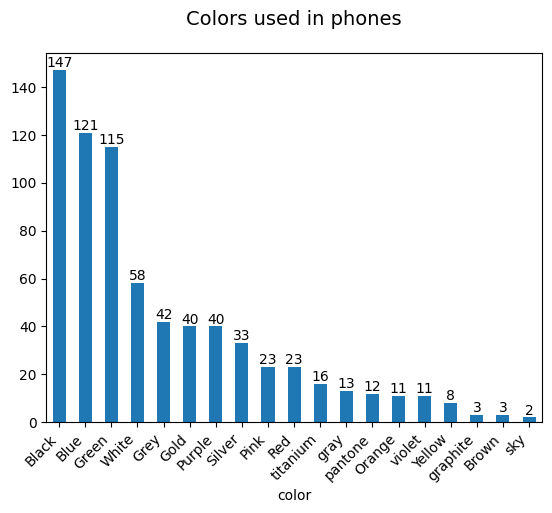

In [10]:
ax=df[df['color']!='Other']['color'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45, ha='right')
ax.set_title("Colors used in phones", fontsize=14, pad=20)
plt.show()

In [11]:
df['price'].describe()

count       820.000000
mean      24873.821951
std       22536.770801
min        4399.000000
25%       11499.000000
50%       17942.500000
75%       27999.000000
max      157900.000000
Name: price, dtype: float64

## Question 3
How are the smartphone prices distributed in the dataset? Create a histogram with appropriate price ranges,
display the frequency of phones in each range,and label the bars.

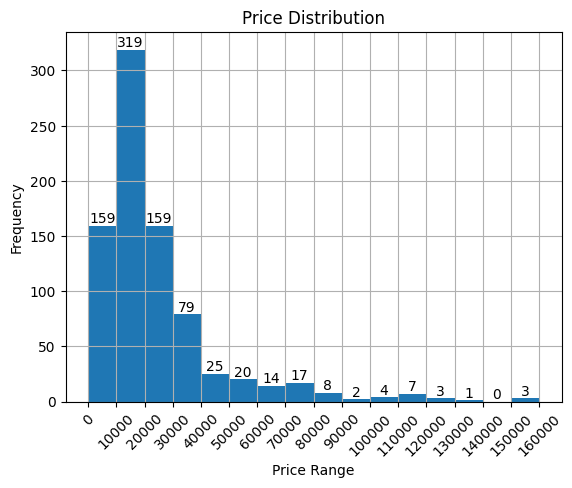

In [12]:
bin=np.linspace(0,160000,17)
ax=df['price'].hist(bins=bin)
ax.bar_label(ax.containers[0])
plt.xticks(bin, rotation=45) 
ax.set_xlabel("Price Range")
ax.set_ylabel("Frequency")
ax.set_title("Price Distribution")
plt.show()

## Question 4
Which smartphone model in the dataset has the highest price?

In [13]:
df.sort_values('price',ascending=False).head(1)['model_name'].values[0]

'Apple iPhone 16 Pro Max'

## Question 5
For each smartphone brand, which model is the most expensive,
and what is its price? Sort the results by price in descending order.

In [14]:
df.groupby('brand').max()[['model_name','price']].sort_values('price',ascending=False)

,model_name,price
brand,,
APPLE,Apple iPhone 16e,157900
GOOGLE,Google Pixel 9a,129999
SAMSUNG,Samsung M36,129999
VIVO,Vivo Y400 Pro,94999
ONEPLUS,OnePlus Nord CE5,71350
OPPO,OPPO Reno14 Pro,54999
MOTOROLA,Motorola Razr 60,49999
IQOO,iQOO Z9x,42499
XIAOMI,Xiaomi 14 CIVI,39999


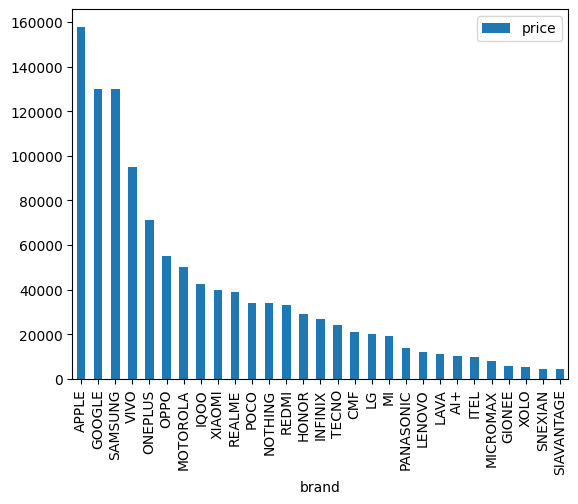

In [15]:
df.groupby('brand').max()[['model_name','price']].sort_values('price',ascending=False).plot(kind='bar')
plt.show()

## Question 6
For each smartphone brand, list the top 5 most expensive models along with their prices.

In [16]:
df_max = df.groupby(['brand', 'model_name'], as_index=False)['price'].max()

df_top5 = df_max.sort_values(['brand', 'price'], ascending=[True, False]).groupby('brand').head(5)
df_top5

,brand,model_name,price
0,AI+,Ai+ Nova,9999
1,AI+,Ai+ Pulse,6999
9,APPLE,Apple iPhone 16 Pro Max,157900
8,APPLE,Apple iPhone 16 Pro,114900
7,APPLE,Apple iPhone 16 Plus,89999
...,...,...,...
246,VIVO,Vivo V40 Pro,49999
242,VIVO,Vivo T4 Ultra,41999
249,VIVO,Vivo V60,40999
264,XIAOMI,Xiaomi 14 CIVI,39999


In [17]:
df

,brand,model_name,color,price,5G_flag,avg_rating,reviews,battery,processor,RAM,ROM,display_size,display_type
0,MOTOROLA,Moto G05,Green,6999,No,4.2,47939,5100,Unisoc T606,4,64,16.94,HD+ Display
1,POCO,POCO C71,Gold,6999,No,4.1,11677,5200,Unisoc T7250,6,128,17.48,HD+ Display
2,POCO,POCO C71,Blue,6399,No,3.9,25608,5200,Unisoc T7250,4,64,17.48,HD+ Display
3,SAMSUNG,Samsung Galaxy F05,Blue,6499,No,4.2,64333,5000,MediaTek Helio G85,4,64,17.12,HD+ Display
4,MOTOROLA,Motorola Edge 60 Fusion,pantone,22999,Yes,4.5,48575,5500,Qualcomm Snapdragon 7s Gen 2,8,256,16.94,Display
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,SAMSUNG,Samsung Galaxy A36,Black,30999,Yes,4.3,1061,5000,MediaTek Helio G80,8,128,17.02,Full HD+ Display
816,GOOGLE,Google Pixel 9 Pro XL,Other,119999,Yes,4.6,877,5060,Google Tensor G4,16,512,17.27,Display
817,REDMI,Redmi Note 14 Pro+,Purple,26249,Yes,4.2,177,6200,MediaTek Dimensity 9200+,8,128,16.94,Display
818,REALME,Realme P1,Green,13000,Yes,4.4,51664,5000,MediaTek Dimensity 9200+,8,128,16.94,Full HD+ Display


## Question 7
How many smartphones in the dataset support 5G, and how many do not?

In [18]:
df['5G_flag'].value_counts()

5G_flag
Yes    570
No     250
Name: count, dtype: int64

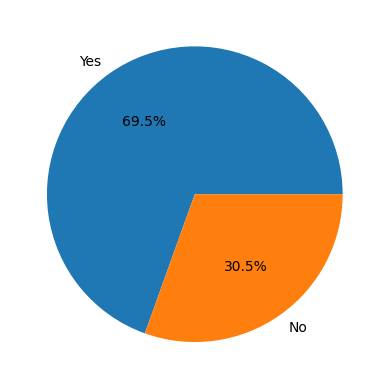

In [19]:
df['5G_flag'].value_counts().plot(kind='pie',autopct='%0.01f%%',ylabel='')
plt.show()

In [20]:
df

,brand,model_name,color,price,5G_flag,avg_rating,reviews,battery,processor,RAM,ROM,display_size,display_type
0,MOTOROLA,Moto G05,Green,6999,No,4.2,47939,5100,Unisoc T606,4,64,16.94,HD+ Display
1,POCO,POCO C71,Gold,6999,No,4.1,11677,5200,Unisoc T7250,6,128,17.48,HD+ Display
2,POCO,POCO C71,Blue,6399,No,3.9,25608,5200,Unisoc T7250,4,64,17.48,HD+ Display
3,SAMSUNG,Samsung Galaxy F05,Blue,6499,No,4.2,64333,5000,MediaTek Helio G85,4,64,17.12,HD+ Display
4,MOTOROLA,Motorola Edge 60 Fusion,pantone,22999,Yes,4.5,48575,5500,Qualcomm Snapdragon 7s Gen 2,8,256,16.94,Display
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,SAMSUNG,Samsung Galaxy A36,Black,30999,Yes,4.3,1061,5000,MediaTek Helio G80,8,128,17.02,Full HD+ Display
816,GOOGLE,Google Pixel 9 Pro XL,Other,119999,Yes,4.6,877,5060,Google Tensor G4,16,512,17.27,Display
817,REDMI,Redmi Note 14 Pro+,Purple,26249,Yes,4.2,177,6200,MediaTek Dimensity 9200+,8,128,16.94,Display
818,REALME,Realme P1,Green,13000,Yes,4.4,51664,5000,MediaTek Dimensity 9200+,8,128,16.94,Full HD+ Display


## Question 8
Visualize the distribution of key numerical features in the smartphone dataset. For each feature 
(price, average rating, reviews, battery, RAM, ROM, display size), plot a histogram with a KDE 
and a boxplot to identify data spread and outliers.

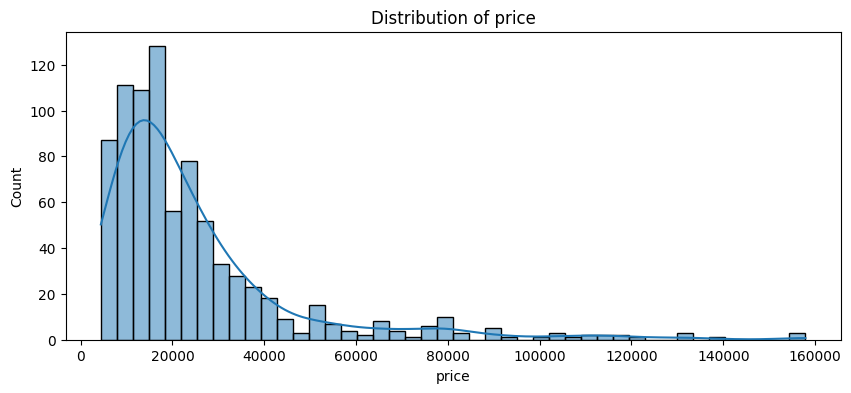

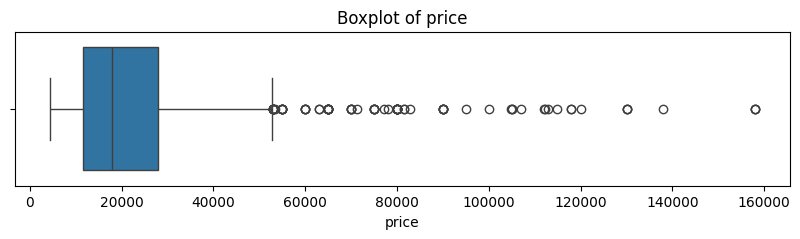

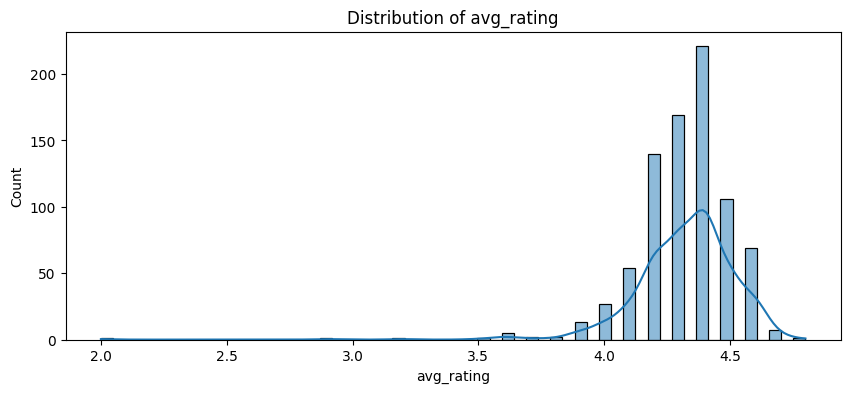

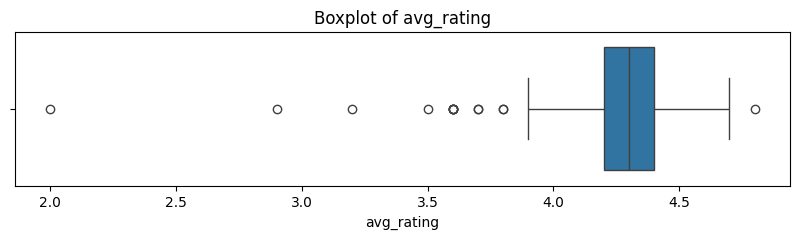

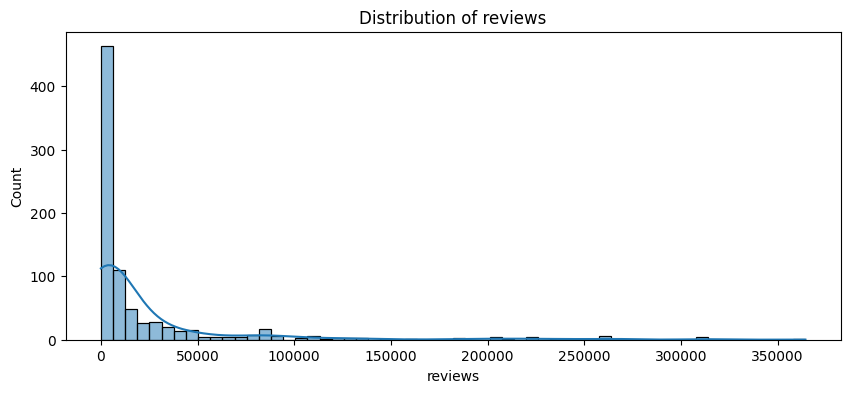

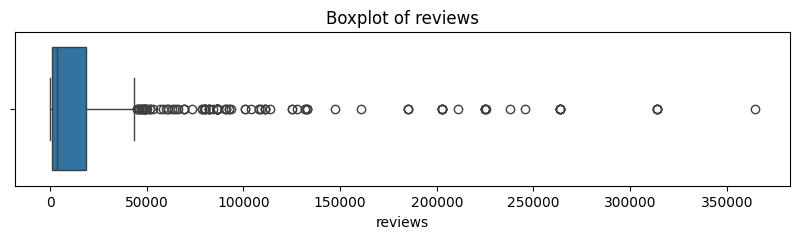

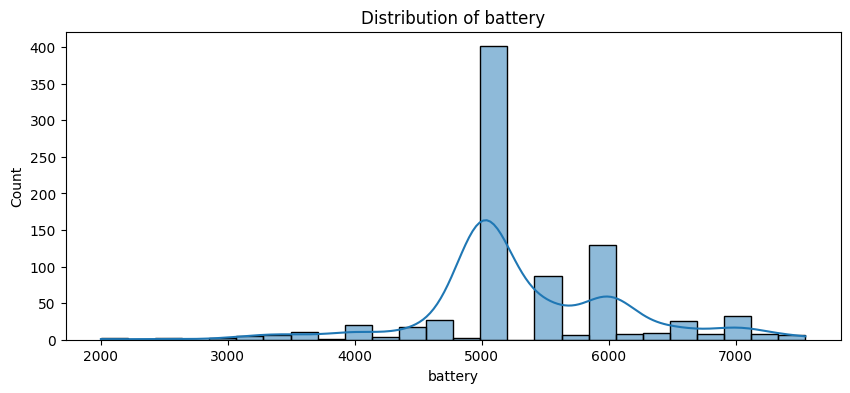

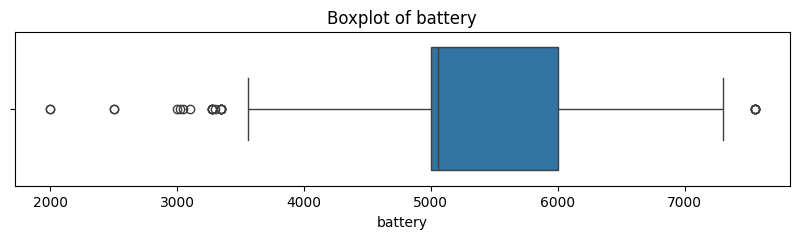

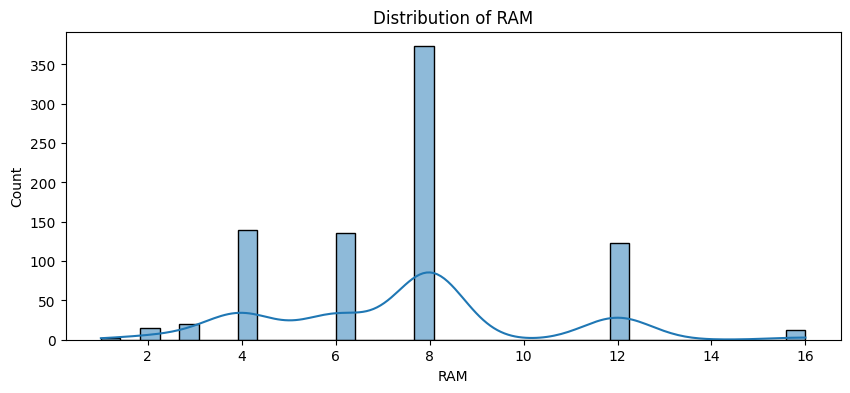

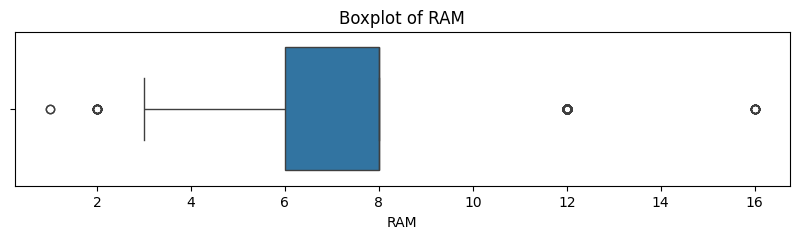

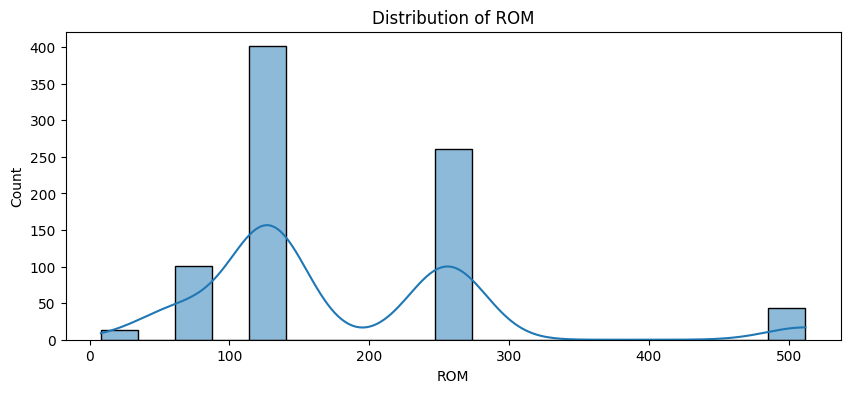

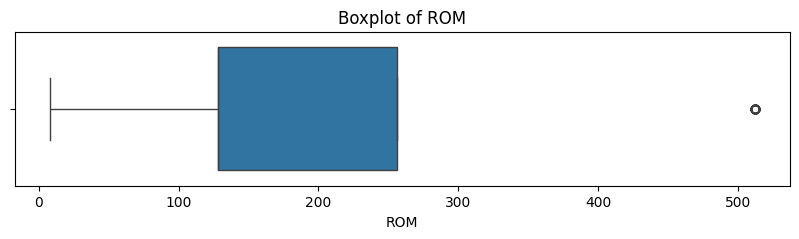

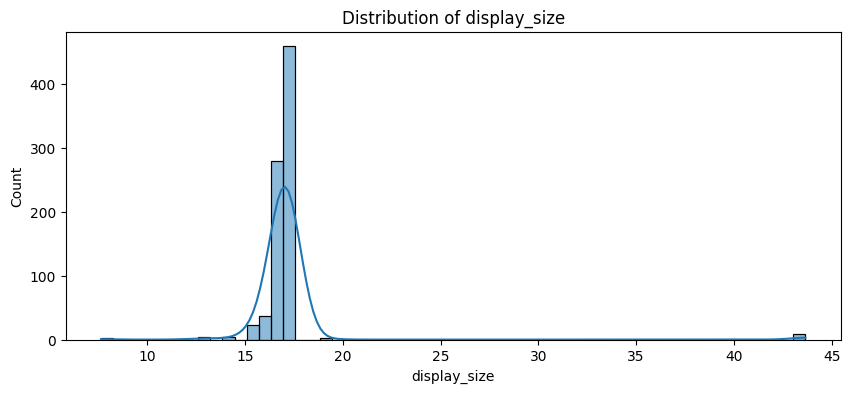

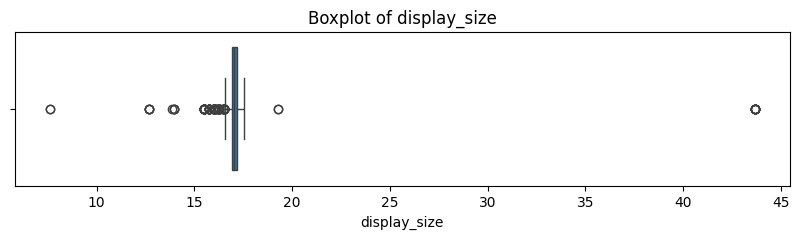

In [21]:
num_features = ['price', 'avg_rating', 'reviews', 'battery', 'RAM', 'ROM', 'display_size']
for col in num_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## quetion 9
Visualize the distribution of key categorical features in the smartphone dataset. For each feature (brand, color, 5G support, processor, display type), create a countplot to show the frequency of each category.

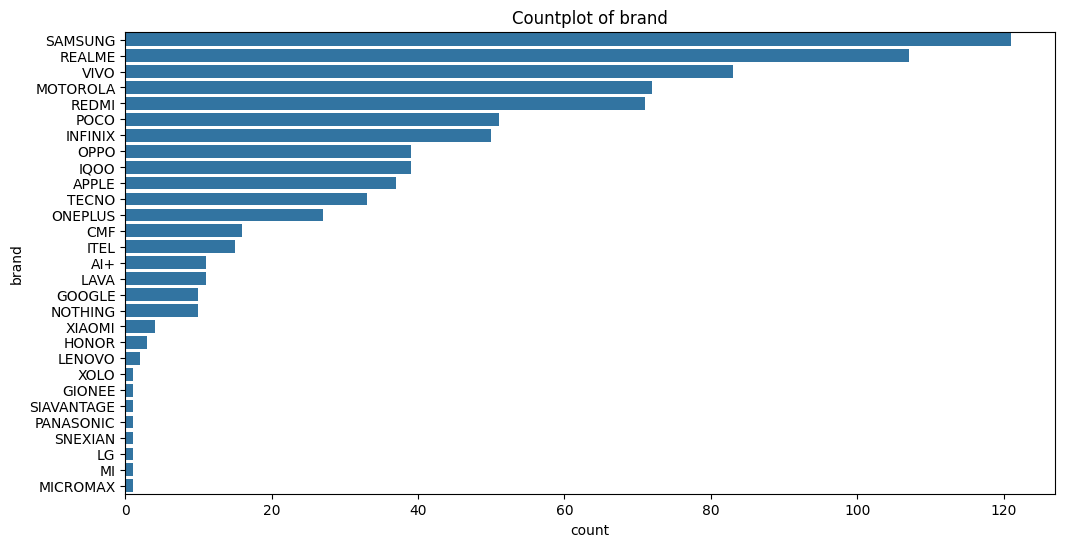

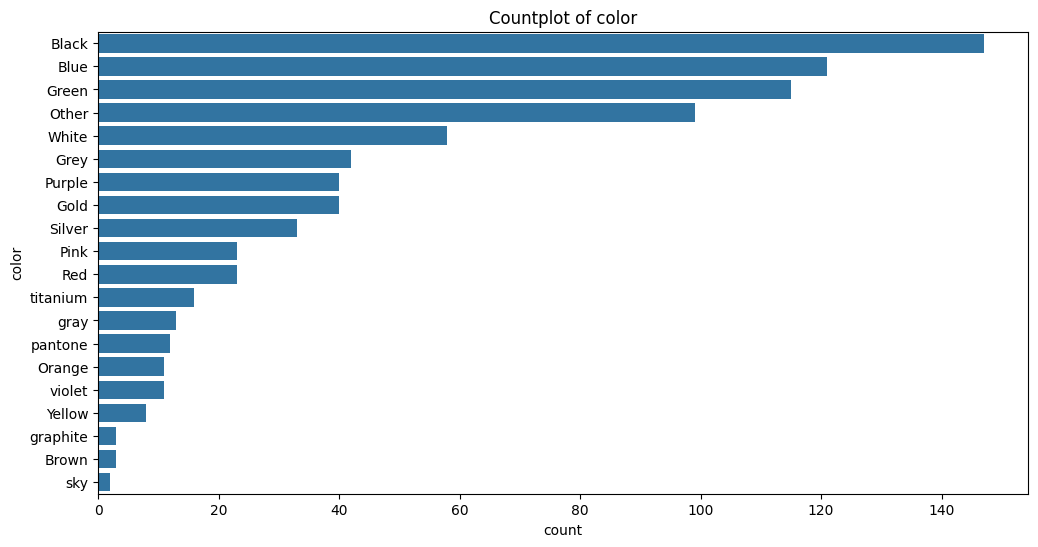

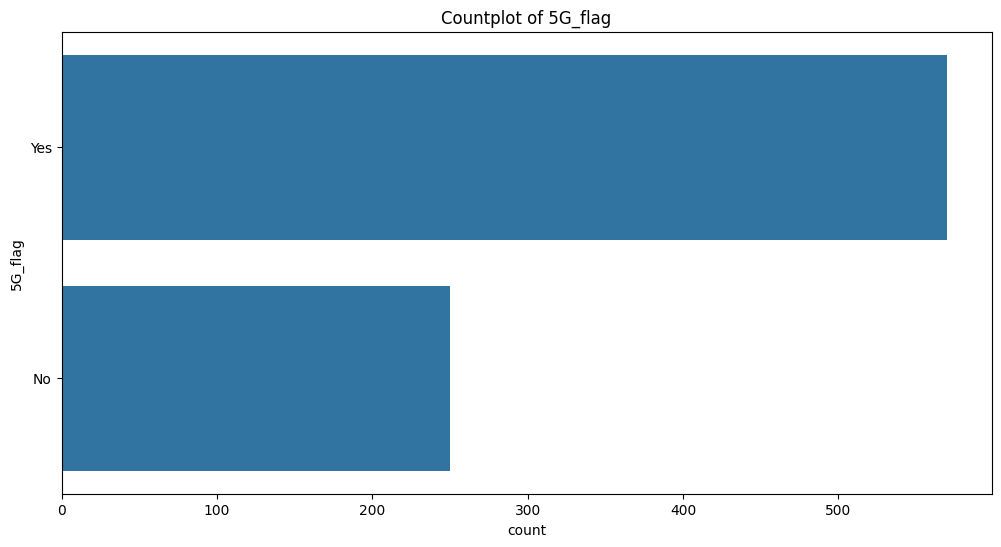

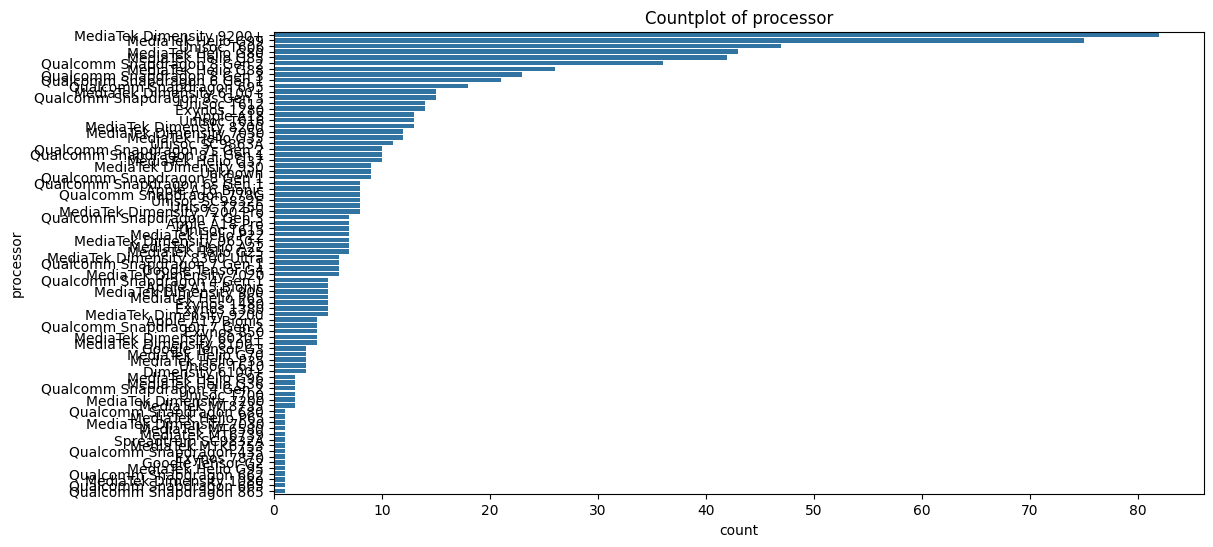

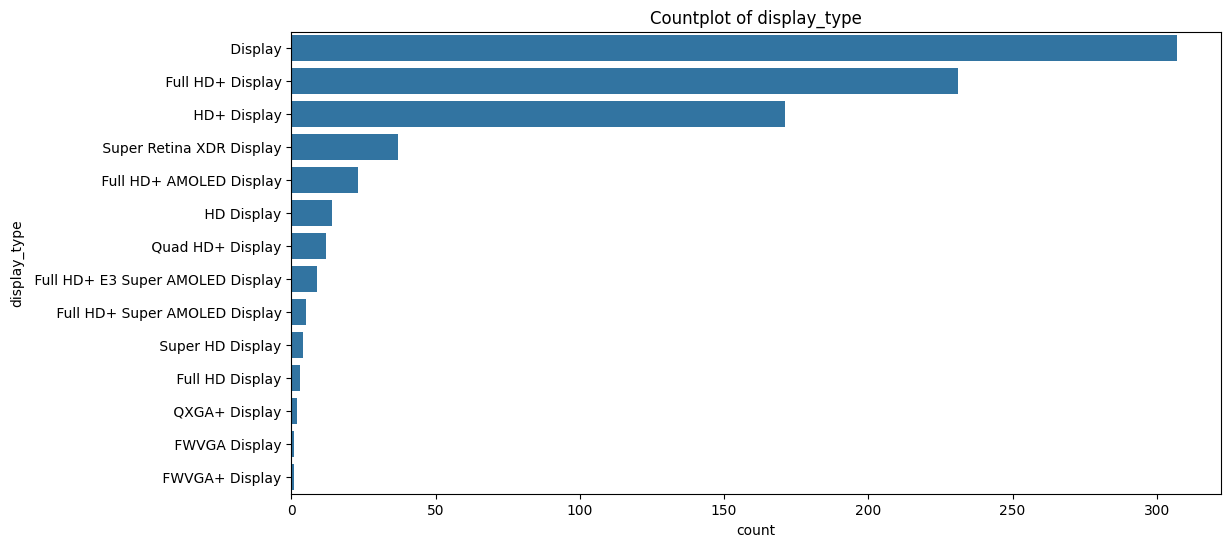

In [22]:
cat_features = ['brand', 'color', '5G_flag', 'processor', 'display_type']
for col in cat_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.show()

## Question 10
 Unique counts, missing values

In [23]:
# 3. Unique counts, missing values
for col in df.columns:
    print(f"{col}: Unique={df[col].nunique()}, Missing={df[col].isnull().sum()}")

brand: Unique=29, Missing=0
model_name: Unique=266, Missing=0
color: Unique=20, Missing=0
price: Unique=291, Missing=0
5G_flag: Unique=2, Missing=0
avg_rating: Unique=18, Missing=0
reviews: Unique=379, Missing=0
battery: Unique=54, Missing=0
processor: Unique=81, Missing=0
RAM: Unique=8, Missing=0
ROM: Unique=7, Missing=0
display_size: Unique=41, Missing=0
display_type: Unique=14, Missing=0


##  --->
Examine the relationship between selected numerical features in the smartphone dataset. 
For the pairs (price vs avg_rating, price vs battery, price vs RAM, reviews vs avg_rating), 
create scatter plots and calculate the correlation coefficient to understand how these features are related.

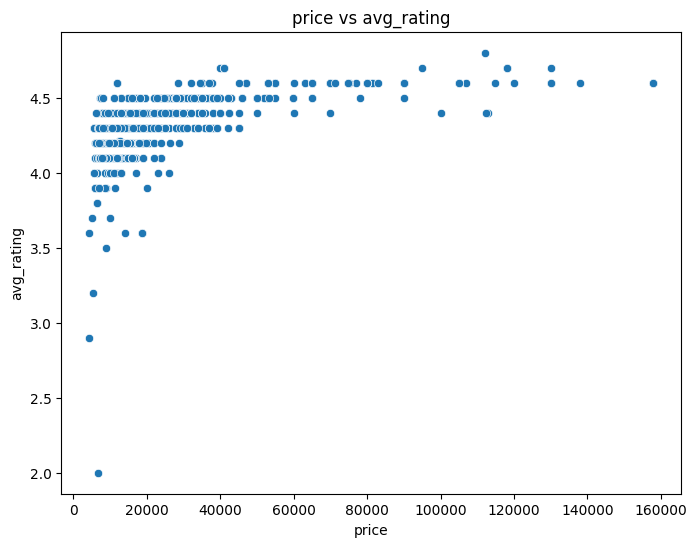

Correlation between price and avg_rating: 0.548753895278596


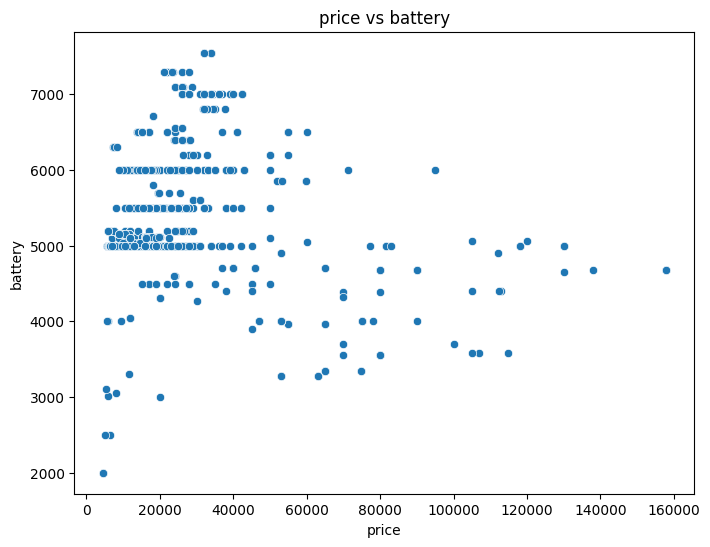

Correlation between price and battery: -0.13980129935077226


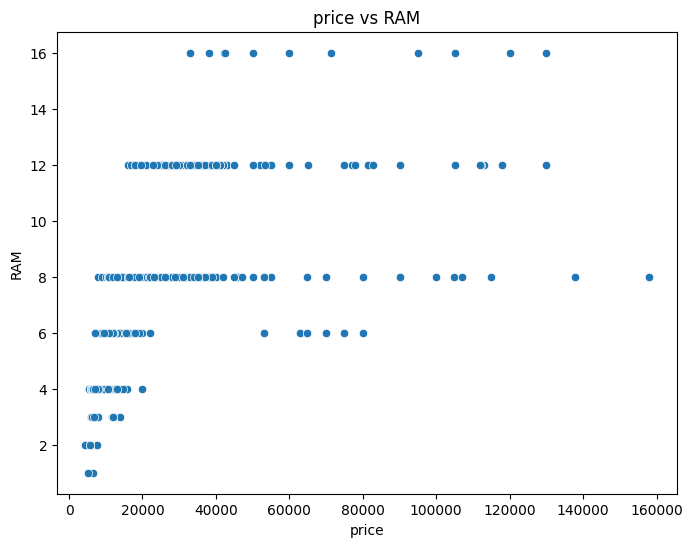

Correlation between price and RAM: 0.5326063381288991


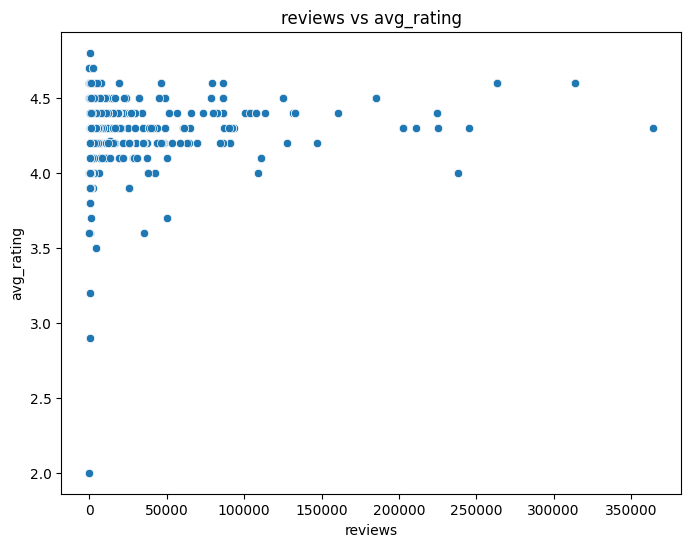

Correlation between reviews and avg_rating: 0.10036848240616196


In [24]:
# 1. Numeric vs Numeric - Scatter & Correlation
pairs = [('price', 'avg_rating'), ('price', 'battery'), ('price', 'RAM'), ('reviews', 'avg_rating')]
for x, y in pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[x], y=df[y])
    plt.title(f'{x} vs {y}')
    plt.show()
    print(f'Correlation between {x} and {y}:', df[[x, y]].corr().iloc[0,1])

## Question 11
Analyze the distribution of 5G support across different smartphone brands.
Create a heatmap to show the count of 5G and non-5G phones for each brand.

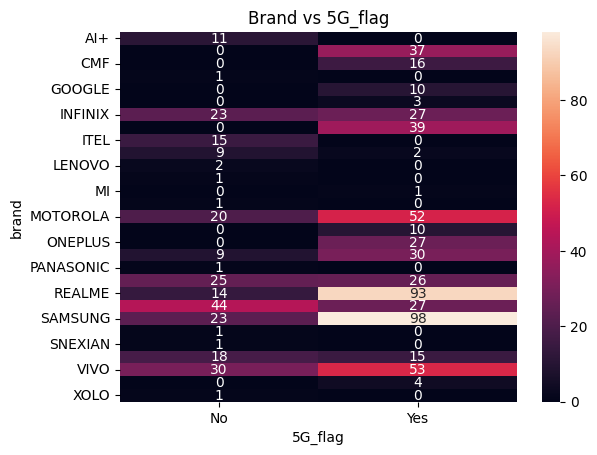

In [26]:
# 3. Categorical vs Categorical - Crosstab & Heatmap
cross = pd.crosstab(df['brand'], df['5G_flag'])
sns.heatmap(cross, annot=True, fmt='d')
plt.title('Brand vs 5G_flag')
plt.show()

## Question 12
Explore pairwise relationships among key numerical features in the smartphone dataset.
Create a pairplot for price, average rating, reviews, battery, RAM, and 
ROM to visualize distributions and correlations between features.

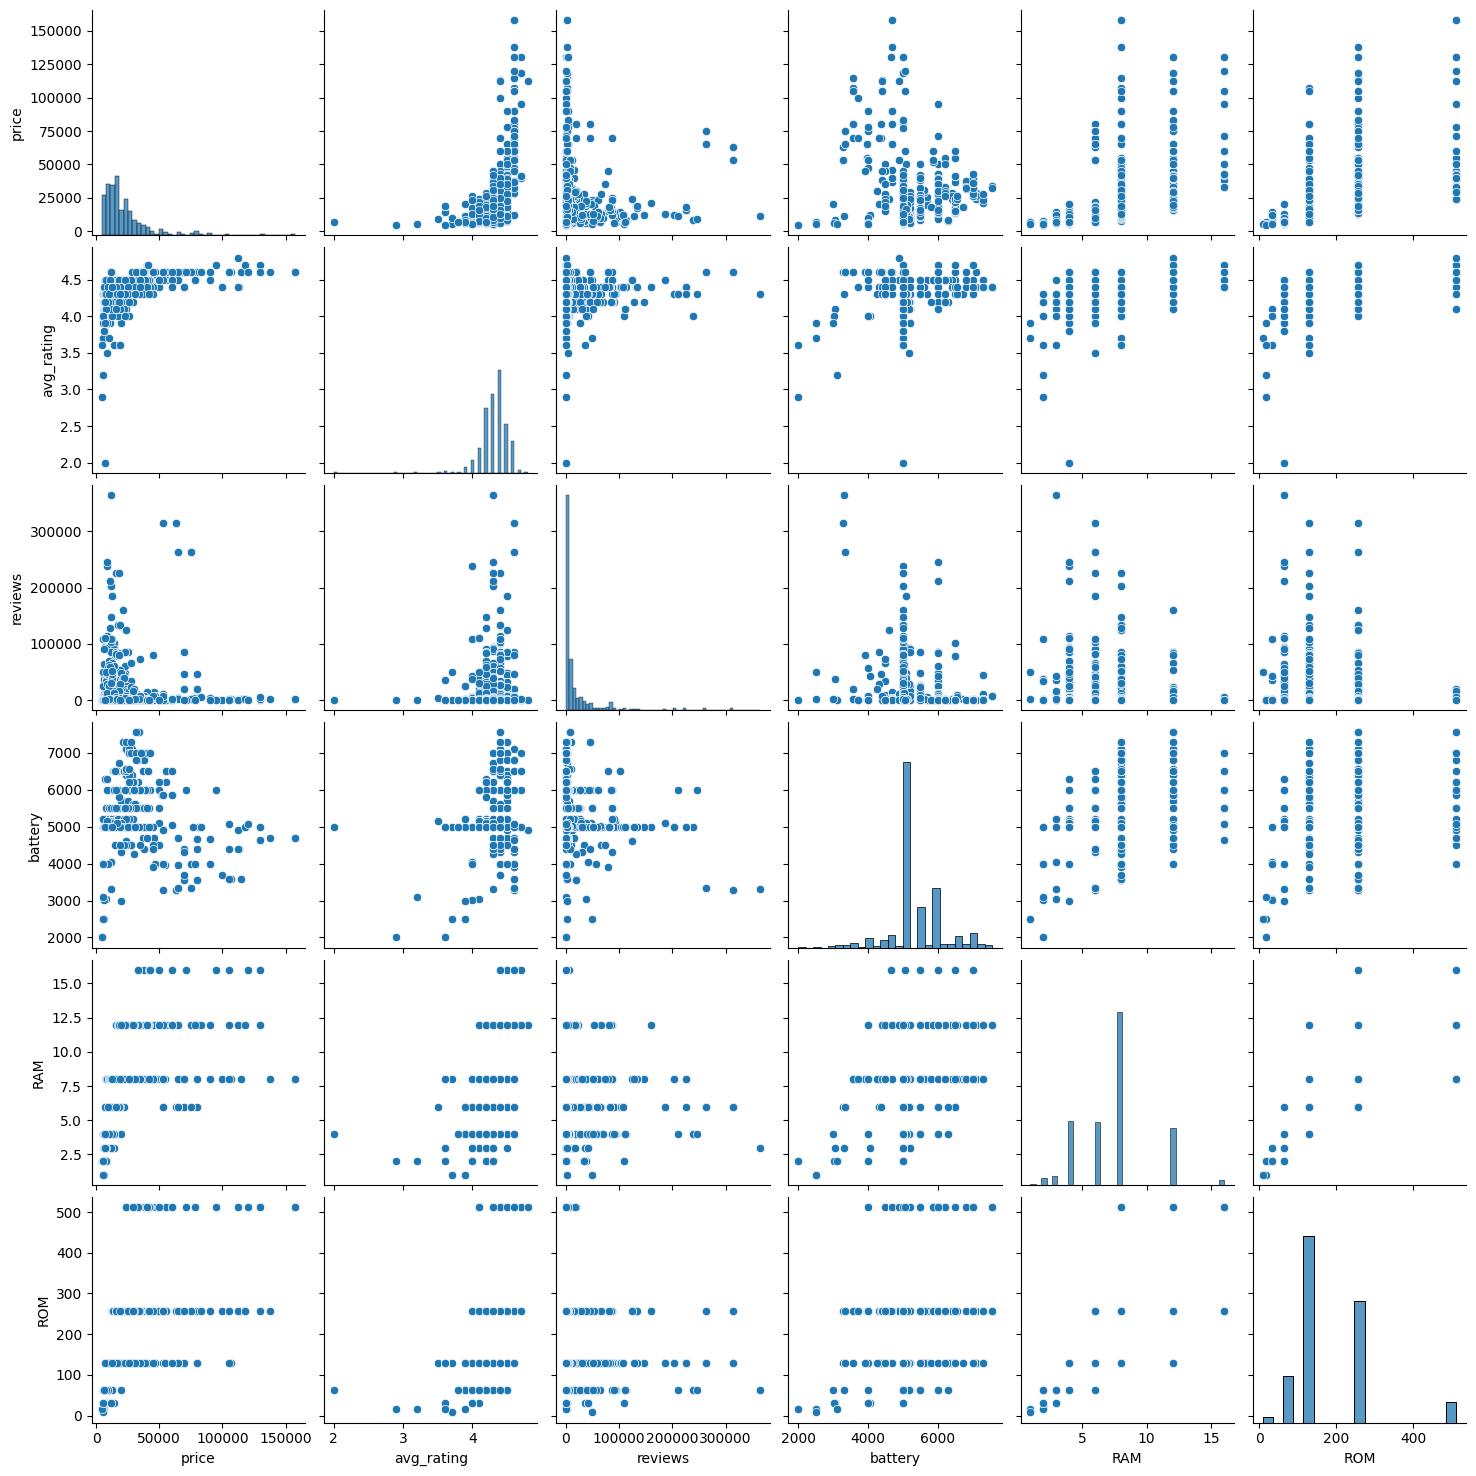

In [27]:
sns.pairplot(df[['price', 'avg_rating', 'reviews', 'battery', 'RAM', 'ROM']])
plt.show()

## Question 13
For each smartphone brand, analyze the average price, average rating, average battery capacity, 
and total number of reviews based on 5G support. Group the data by brand and 5G_flag 
and calculate these aggregated metrics.

In [28]:
# 2. Grouped Statistics
grouped = df.groupby(['brand', '5G_flag']).agg({
    'price': 'mean',
    'avg_rating': 'mean',
    'battery': 'mean',
    'reviews': 'sum'
}).reset_index()
print(grouped)

         brand 5G_flag         price  avg_rating      battery  reviews
0          AI+      No   7135.363636    4.054545  5000.000000    47146
1        APPLE     Yes  84030.945946    4.600000  3968.270270  3157801
2          CMF     Yes  18499.000000    4.400000  5000.000000   584828
3       GIONEE      No   5649.000000    4.000000  5000.000000   108956
4       GOOGLE     Yes  70799.000000    4.450000  4739.800000    46415
5        HONOR     Yes  26978.333333    4.366667  5200.000000      403
6      INFINIX      No   8390.304348    4.239130  5002.173913   650904
7      INFINIX     Yes  15350.851852    4.344444  5333.333333   297768
8         IQOO     Yes  22868.461538    4.369231  6461.538462    71518
9         ITEL      No   7236.200000    4.113333  4734.666667     7096
10        LAVA      No   6921.000000    3.722222  4511.111111     5297
11        LAVA     Yes   9854.000000    4.150000  5000.000000     1565
12      LENOVO      No  12000.000000    4.000000  4050.000000    84108
13    

## Question 14
Examine the correlations among key numerical features in the smartphone dataset. 
Create a heatmap of the correlation matrix for price, average rating, reviews, battery, RAM, ROM,
and display size.

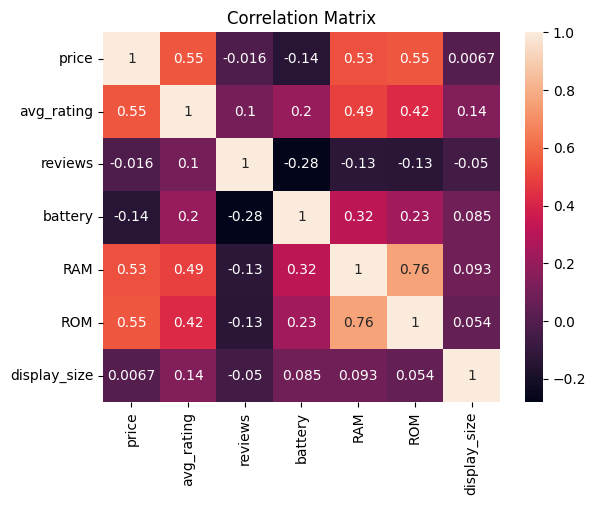

In [29]:
# 3. Heatmap of Correlation Matrix
corr = df[['price', 'avg_rating', 'reviews', 'battery', 'RAM', 'ROM', 'display_size']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

## Question 15
Create a pivot table to compare the average ratings of smartphones for each brand based on 5G support.
What are the mean ratings for 5G and non-5G phones across different brands?

In [30]:
# 4. Pivot Table for Multivariate Comparison
pivot = df.pivot_table(values='avg_rating', index='brand', columns='5G_flag', aggfunc='mean')
print(pivot)

5G_flag           No       Yes
brand                         
AI+         4.054545       NaN
APPLE            NaN  4.600000
CMF              NaN  4.400000
GIONEE      4.000000       NaN
GOOGLE           NaN  4.450000
HONOR            NaN  4.366667
INFINIX     4.239130  4.344444
IQOO             NaN  4.369231
ITEL        4.113333       NaN
LAVA        3.722222  4.150000
LENOVO      4.000000       NaN
LG          3.900000       NaN
MI               NaN  4.200000
MICROMAX    4.100000       NaN
MOTOROLA    4.235000  4.332692
NOTHING          NaN  4.490000
ONEPLUS          NaN  4.474074
OPPO        4.233333  4.440000
PANASONIC   3.600000       NaN
POCO        4.064000  4.311538
REALME      4.400000  4.380645
REDMI       4.190909  4.252593
SAMSUNG     4.117391  4.331633
SIAVANTAGE  2.900000       NaN
SNEXIAN     3.600000       NaN
TECNO       4.300000  4.300000
VIVO        4.356667  4.456604
XIAOMI           NaN  4.375000
XOLO        3.700000       NaN


In [31]:
df

,brand,model_name,color,price,5G_flag,avg_rating,reviews,battery,processor,RAM,ROM,display_size,display_type
0,MOTOROLA,Moto G05,Green,6999,No,4.2,47939,5100,Unisoc T606,4,64,16.94,HD+ Display
1,POCO,POCO C71,Gold,6999,No,4.1,11677,5200,Unisoc T7250,6,128,17.48,HD+ Display
2,POCO,POCO C71,Blue,6399,No,3.9,25608,5200,Unisoc T7250,4,64,17.48,HD+ Display
3,SAMSUNG,Samsung Galaxy F05,Blue,6499,No,4.2,64333,5000,MediaTek Helio G85,4,64,17.12,HD+ Display
4,MOTOROLA,Motorola Edge 60 Fusion,pantone,22999,Yes,4.5,48575,5500,Qualcomm Snapdragon 7s Gen 2,8,256,16.94,Display
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,SAMSUNG,Samsung Galaxy A36,Black,30999,Yes,4.3,1061,5000,MediaTek Helio G80,8,128,17.02,Full HD+ Display
816,GOOGLE,Google Pixel 9 Pro XL,Other,119999,Yes,4.6,877,5060,Google Tensor G4,16,512,17.27,Display
817,REDMI,Redmi Note 14 Pro+,Purple,26249,Yes,4.2,177,6200,MediaTek Dimensity 9200+,8,128,16.94,Display
818,REALME,Realme P1,Green,13000,Yes,4.4,51664,5000,MediaTek Dimensity 9200+,8,128,16.94,Full HD+ Display


## Question 16
For each smartphone brand, consider only the most expensive model. 
Plot a scatter plot of the number of reviews versus average rating to examine 
the relationship between popularity and rating for these top-priced models.

In [32]:
temp=df.loc[df.groupby('brand')['price'].idxmax()]

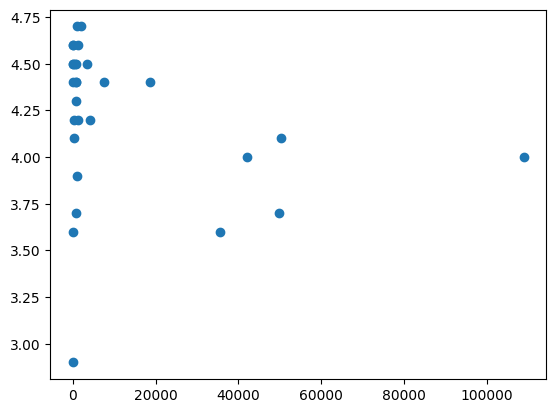

In [33]:
plt.scatter(temp['reviews'],temp['avg_rating'])